In [2]:
import geopandas as gpd
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt

In [3]:
AcresTable = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv")
Ag2012 = []
Ag2017 = []
random.seed(0)
for row in AcresTable:
    if 'AcresHarv2012' in row:
        Ag2012.append(row)
    if 'AcresHarv2017' in row:
        Ag2017.append(row)

colnames = ['county','NumOperations2012','AcresHarv2012', 'NumOperations2017', 'AcresHarv2017']
#data = pd.read_csv('AcresTotalsCounty20122017.csv', names=colnames)

col_list2012 = ["county", "AcresHarv2012"]
colorado2012 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols=col_list2012)
col_list2017 = ["county", "AcresHarv2017"]
colorado2017 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols = col_list2017)

top2012 = []
top2017 = []
top5 = ['adams', 'kitcarson', 'yuma', 'weld', 'phillips']
for row in colorado2012.iterrows():
    if 'county' == top5:
        top2012.append(row)

In [4]:
datatable = {'county': [], 'AcresHarv2012': [], 'AcresHarv2017': []}
#df = pd.DataFrame(columns = ['county', 'AcresHarv2012', 'AcresHarv2017'])

from csv import DictReader
Names = ["yuma", "weld", "phillips", "kitcarson", "adams"]

with open(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", newline='') as csvfile:
    reader = DictReader(csvfile)
    #rows = [row for row in reader if row['county'] in Names]
    
    for row in reader:
        if row['county'] in Names:
            county = row['county']
            AcresHarv2012 = int(row['AcresHarv2012'])
            AcresHarv2017 = int(row['AcresHarv2017'])
            
            datatable['county'].append(county)
            datatable['AcresHarv2012'].append(AcresHarv2012)
            datatable['AcresHarv2017'].append(AcresHarv2017)
    
HarvGdf = gpd.GeoDataFrame(datatable)
    

In [5]:
HarvGdf

,county,AcresHarv2012,AcresHarv2017
0,adams,249061,283538
1,kitcarson,398644,497533
2,phillips,236894,248339
3,weld,426823,477839
4,yuma,364045,390328


In [6]:
#precipitation join

cty2012prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2012prcp.csv")
cty2017prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2017prcp.csv")

prcp_join = cty2012prcp.merge(cty2017prcp, on='county')

In [7]:
prcp_join

,county,avg_prcp2012,avg_prcp2017
0,adams,10.733571,13.666923
1,kitcarson,12.600000,24.474000
2,weld,9.984000,15.098571
3,yuma,10.690000,20.988000
4,phillips,11.196667,19.223333


In [8]:
all_data = prcp_join.merge(HarvGdf, on='county')

In [9]:
all_data

,county,avg_prcp2012,avg_prcp2017,AcresHarv2012,AcresHarv2017
0,adams,10.733571,13.666923,249061,283538
1,kitcarson,12.600000,24.474000,398644,497533
2,weld,9.984000,15.098571,426823,477839
3,yuma,10.690000,20.988000,364045,390328
4,phillips,11.196667,19.223333,236894,248339


In [10]:
all_data['prcp_change'] = ((all_data['avg_prcp2017'] - all_data['avg_prcp2012']) / all_data['avg_prcp2012']) * 100
all_data['harv_change'] = ((all_data['AcresHarv2017'] - all_data['AcresHarv2012']) / all_data['AcresHarv2012']) * 100

In [11]:
all_data.to_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", index = False)
all_data

,county,avg_prcp2012,avg_prcp2017,AcresHarv2012,AcresHarv2017,prcp_change,harv_change
0,adams,10.733571,13.666923,249061,283538,27.328757,13.842794
1,kitcarson,12.600000,24.474000,398644,497533,94.238095,24.806344
2,weld,9.984000,15.098571,426823,477839,51.227679,11.952496
3,yuma,10.690000,20.988000,364045,390328,96.333022,7.219712
4,phillips,11.196667,19.223333,236894,248339,71.688002,4.831275


In [12]:
print("The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.")

The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.


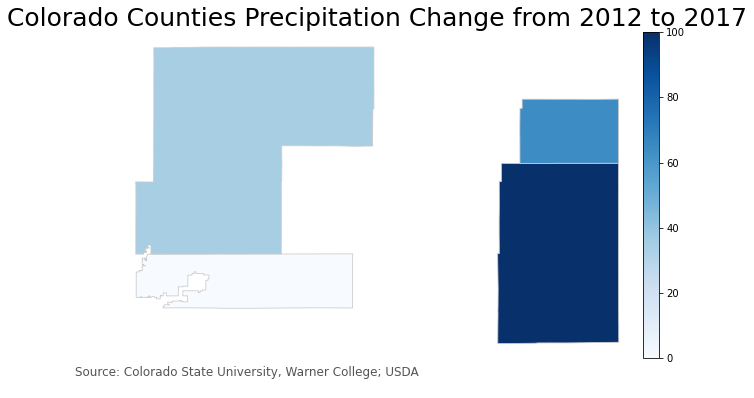

In [35]:
fp = r"C:\Users\catan\Desktop\programming final\Colorado_County_Boundaries-shp\Colorado_County_Boundaries.shp"
map_df = gpd.read_file(fp)
map_df['COUNTY'] = map_df['COUNTY'].str.lower()
df = pd.read_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", header=0)
merged = map_df.set_index('COUNTY').join(df.set_index('county'))
variable = merged['prcp_change']
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, figsize = (10,6))
merged.plot(column = variable, cmap = 'Blues', linewidth = 0.8, ax = ax, edgecolor = '0.8')
merged
ax.axis('off')
ax.set_title('Colorado Counties Precipitation Change from 2012 to 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Colorado State University, Warner College; USDA', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
#cbar = fig.colorbar(sm)
#plt.append_axes("right", size="5%", pad=0.05)
plt.colorbar(sm,fraction=0.046, pad=0.0000001)

fig.savefig(r'C:\Users\catan\Desktop\programming final\map_export.png', dpi=300)

